## Phishing Domain Prediction

In [69]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pickle


In [9]:
df = pd.read_csv('urldata.csv')
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [11]:
df.shape

(10000, 18)

In [12]:
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

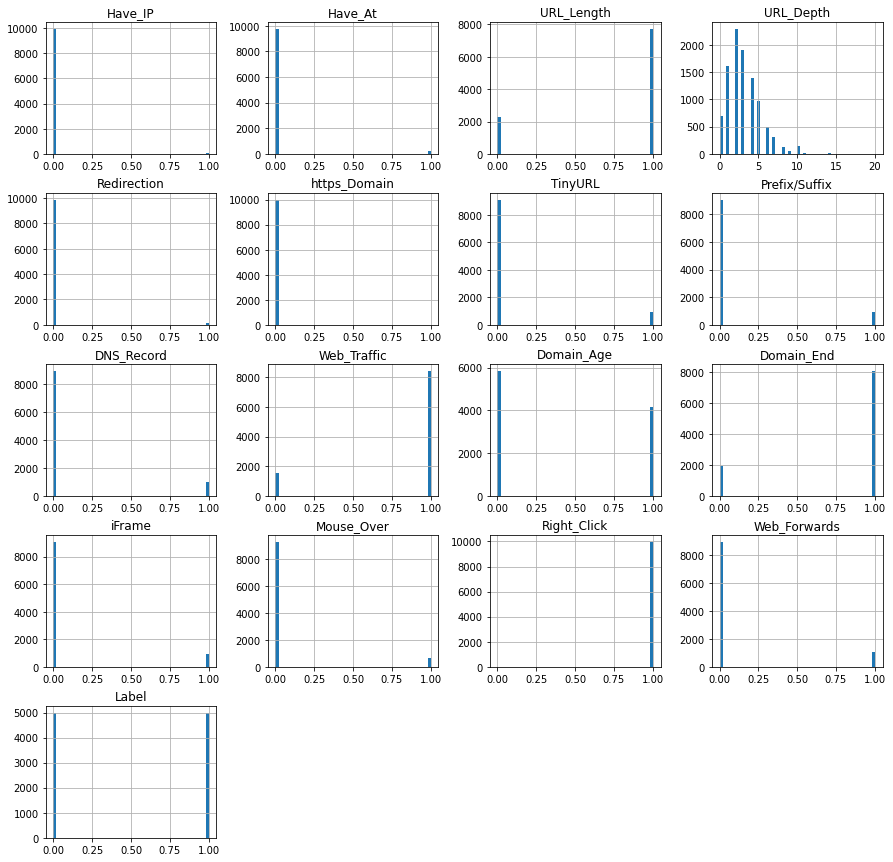

In [20]:
df.hist(bins = 50 , figsize = (15,15))
plt.show()

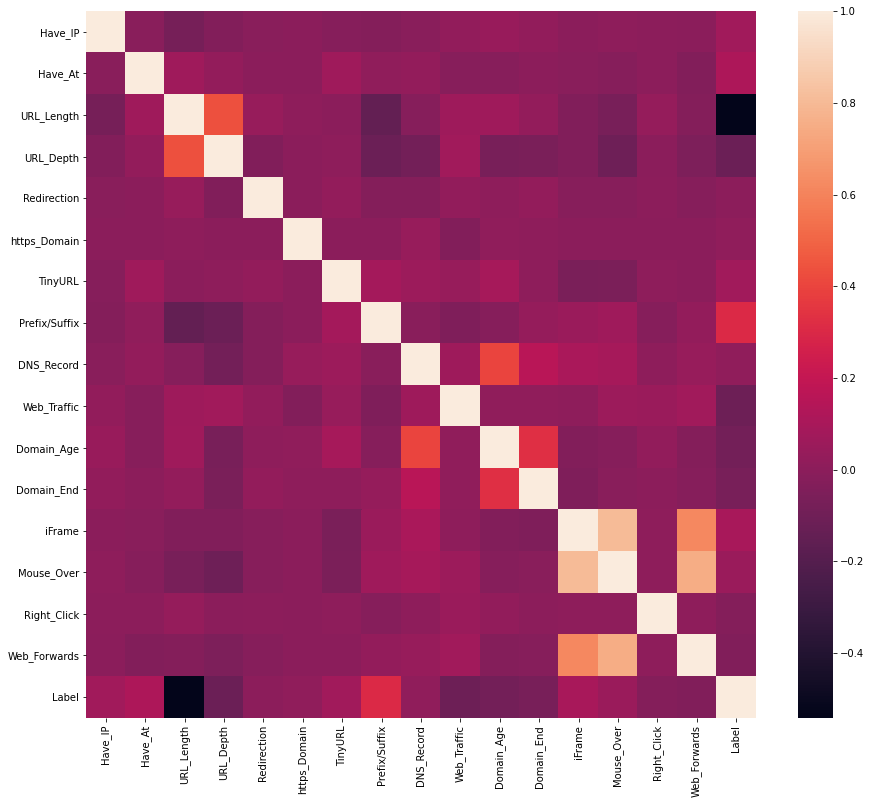

In [19]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()


### EDA

In [21]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [22]:
df_f = df.drop(['Domain'], axis = 1).copy()

In [24]:
df_f.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [25]:
df_f = df_f.sample(frac=1).reset_index(drop=True)
df_f.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,1
3,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1


### spliting data 

In [26]:
y = df_f['Label']  #target variable
X = df_f.drop('Label',axis=1)   #independent variable

In [27]:
X.shape, y.shape

((10000, 16), (10000,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

### ML MODEL TRAINGING 

In [32]:
# machine leaninng model initalizeation 
ML_Model = []
acc_train = []
acc_test = []

def storeResult(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

In [34]:
D_tree = DecisionTreeClassifier(max_depth = 3)
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
y_test_tree = D_tree.predict(X_test)
y_train_tree = D_tree.predict(X_train)

In [37]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.777
Decision Tree: Accuracy on test Data: 0.785


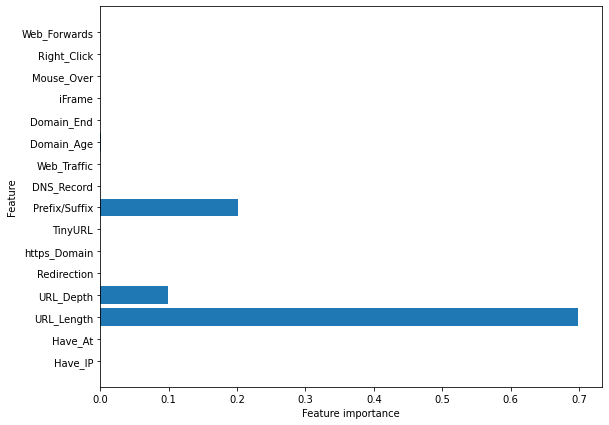

In [40]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), D_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [42]:
storeResult('Decision Tree', acc_train_tree, acc_test_tree)

In [44]:
# random forest
R_forest = RandomForestClassifier(max_depth=5)
R_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [46]:
y_test_forest = R_forest.predict(X_test)
y_train_forest = R_forest.predict(X_train)

In [47]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.817
Random forest: Accuracy on test Data: 0.829


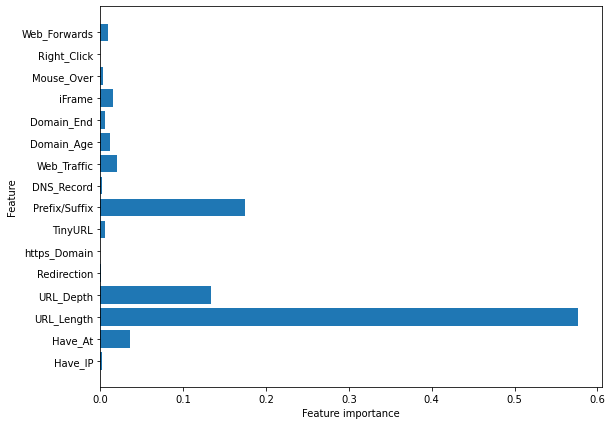

In [48]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), R_forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [50]:
storeResult('Random Forest', acc_train_forest, acc_test_forest)


In [52]:
# Multilayer Perceptrons model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [53]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [54]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.865
Multilayer Perceptrons: Accuracy on test Data: 0.861


In [56]:
storeResult('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [60]:
# SVM MODEL
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [61]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [62]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.800
SVM : Accuracy on test Data: 0.812


In [65]:
storeResult('SVM', acc_train_svm, acc_test_svm)

In [66]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.778,0.785
1,Random Forest,0.817,0.828
2,Multilayer Perceptrons,0.865,0.861
3,SVM,0.800,0.812


In [67]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)


,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.865,0.861
1,Random Forest,0.817,0.828
3,SVM,0.800,0.812
0,Decision Tree,0.778,0.785


In [70]:
pickle.dump(mlp, open('MLPCLSSIFIER.pickle.dat','wb'))

In [71]:
loaded_model = pickle.load(open('MLPCLSSIFIER.pickle.dat','rb'))
loaded_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])